In [38]:
import pandas as pd # Proporciona estructuras de datos y herramientas para el análisis eficiente de datos tabulares, series temporales y matrices etiquetadas o no etiquetadas.
import plotly.express as px # Permite crear diversas figuras a la vez.
import seaborn as sns
import matplotlib.pyplot as plt # Está diseñada para crear gráficos y visualizaciones interactivas de datos, por ejemplo, para trazar las curvas de aprendizaje y evaluar el proceso de entrenamiento.
import numpy as np # Se utiliza para crear arreglos multidimensionales y realizar operaciones matemáticas, lógicas y de álgebra lineal, además de la generación de números aleatorios.
import tensorflow as tf #  Librería desarrollada por Google, es de las más utilizadas para diseñar, entrenar, validar y probar el desarrollo de una red neuronal.
from sklearn.model_selection import train_test_split # Esta biblioteca proporciona el método train_test_split para dividir el conjunto de datos inicial en los conjuntos de entrenamiento y validación.
from sklearn.preprocessing import StandardScaler # Estándariza las características eliminando la media y escalando a una varianza unitaria. (z = (x - u) / s)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Se utiliza para gráficar en una matriz una comparación entre los valores reales y predichos

In [39]:
data = pd.read_csv('/content/Heart_Disease_Prediction.csv');
df = data

In [40]:
df['Heart Disease'] = df['Heart Disease'].replace({'Absence': 0, 'Presence': 1}) # Se eliminan los datos innecesarios
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce') # Se convierte todo el dataframe a valores numéricos para garantizar que no haya problemas con los cálculos posteriores.
df = df.dropna() # Se elimina cualquier fila que contenga valores NaN.

In [41]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [42]:
df.describe() # Genera un resumen estadístico del dataframe, obteniendo información como: el número de datos, promedio, desviación estándar, valor mínimo, el valor por debajo del cual se encuentra el 25%, el valor que separa a los datos en dos partes iguales, el valor por debajo del cual se encuentra el 75% de los datos y el valor máximo.

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [43]:
# Scatter plot matrix
features = df.drop(["Heart Disease"], axis=1).columns # Se elimina la columna occupancy.
fig = px.scatter_matrix(data_frame=df, # Se crea una matriz de gráficos de dispersión con los datos del DataFrame.
                        dimensions=features, # Se especifican las columnas a incluir en el gráfico, sin occupancy.
                        color=df['Heart Disease']) # Se utiliza la columna 'Occupancy' para colorear los puntos en función de la ocupación.
fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False) # Se actualiza el tamaño de los marcadores, se ocultan las diagonales y se muestra solo la mitad inferior de la matriz.
fig.update_layout(width=900, height=600, title="Heart Disease Detection", font_size=9) # Se ajustan las dimensiones del gráfico, se personaliza el título y el tamaño de la fuente del gráfico.
fig.show() # Se muestra la matriz con los gráficos de dispersión.

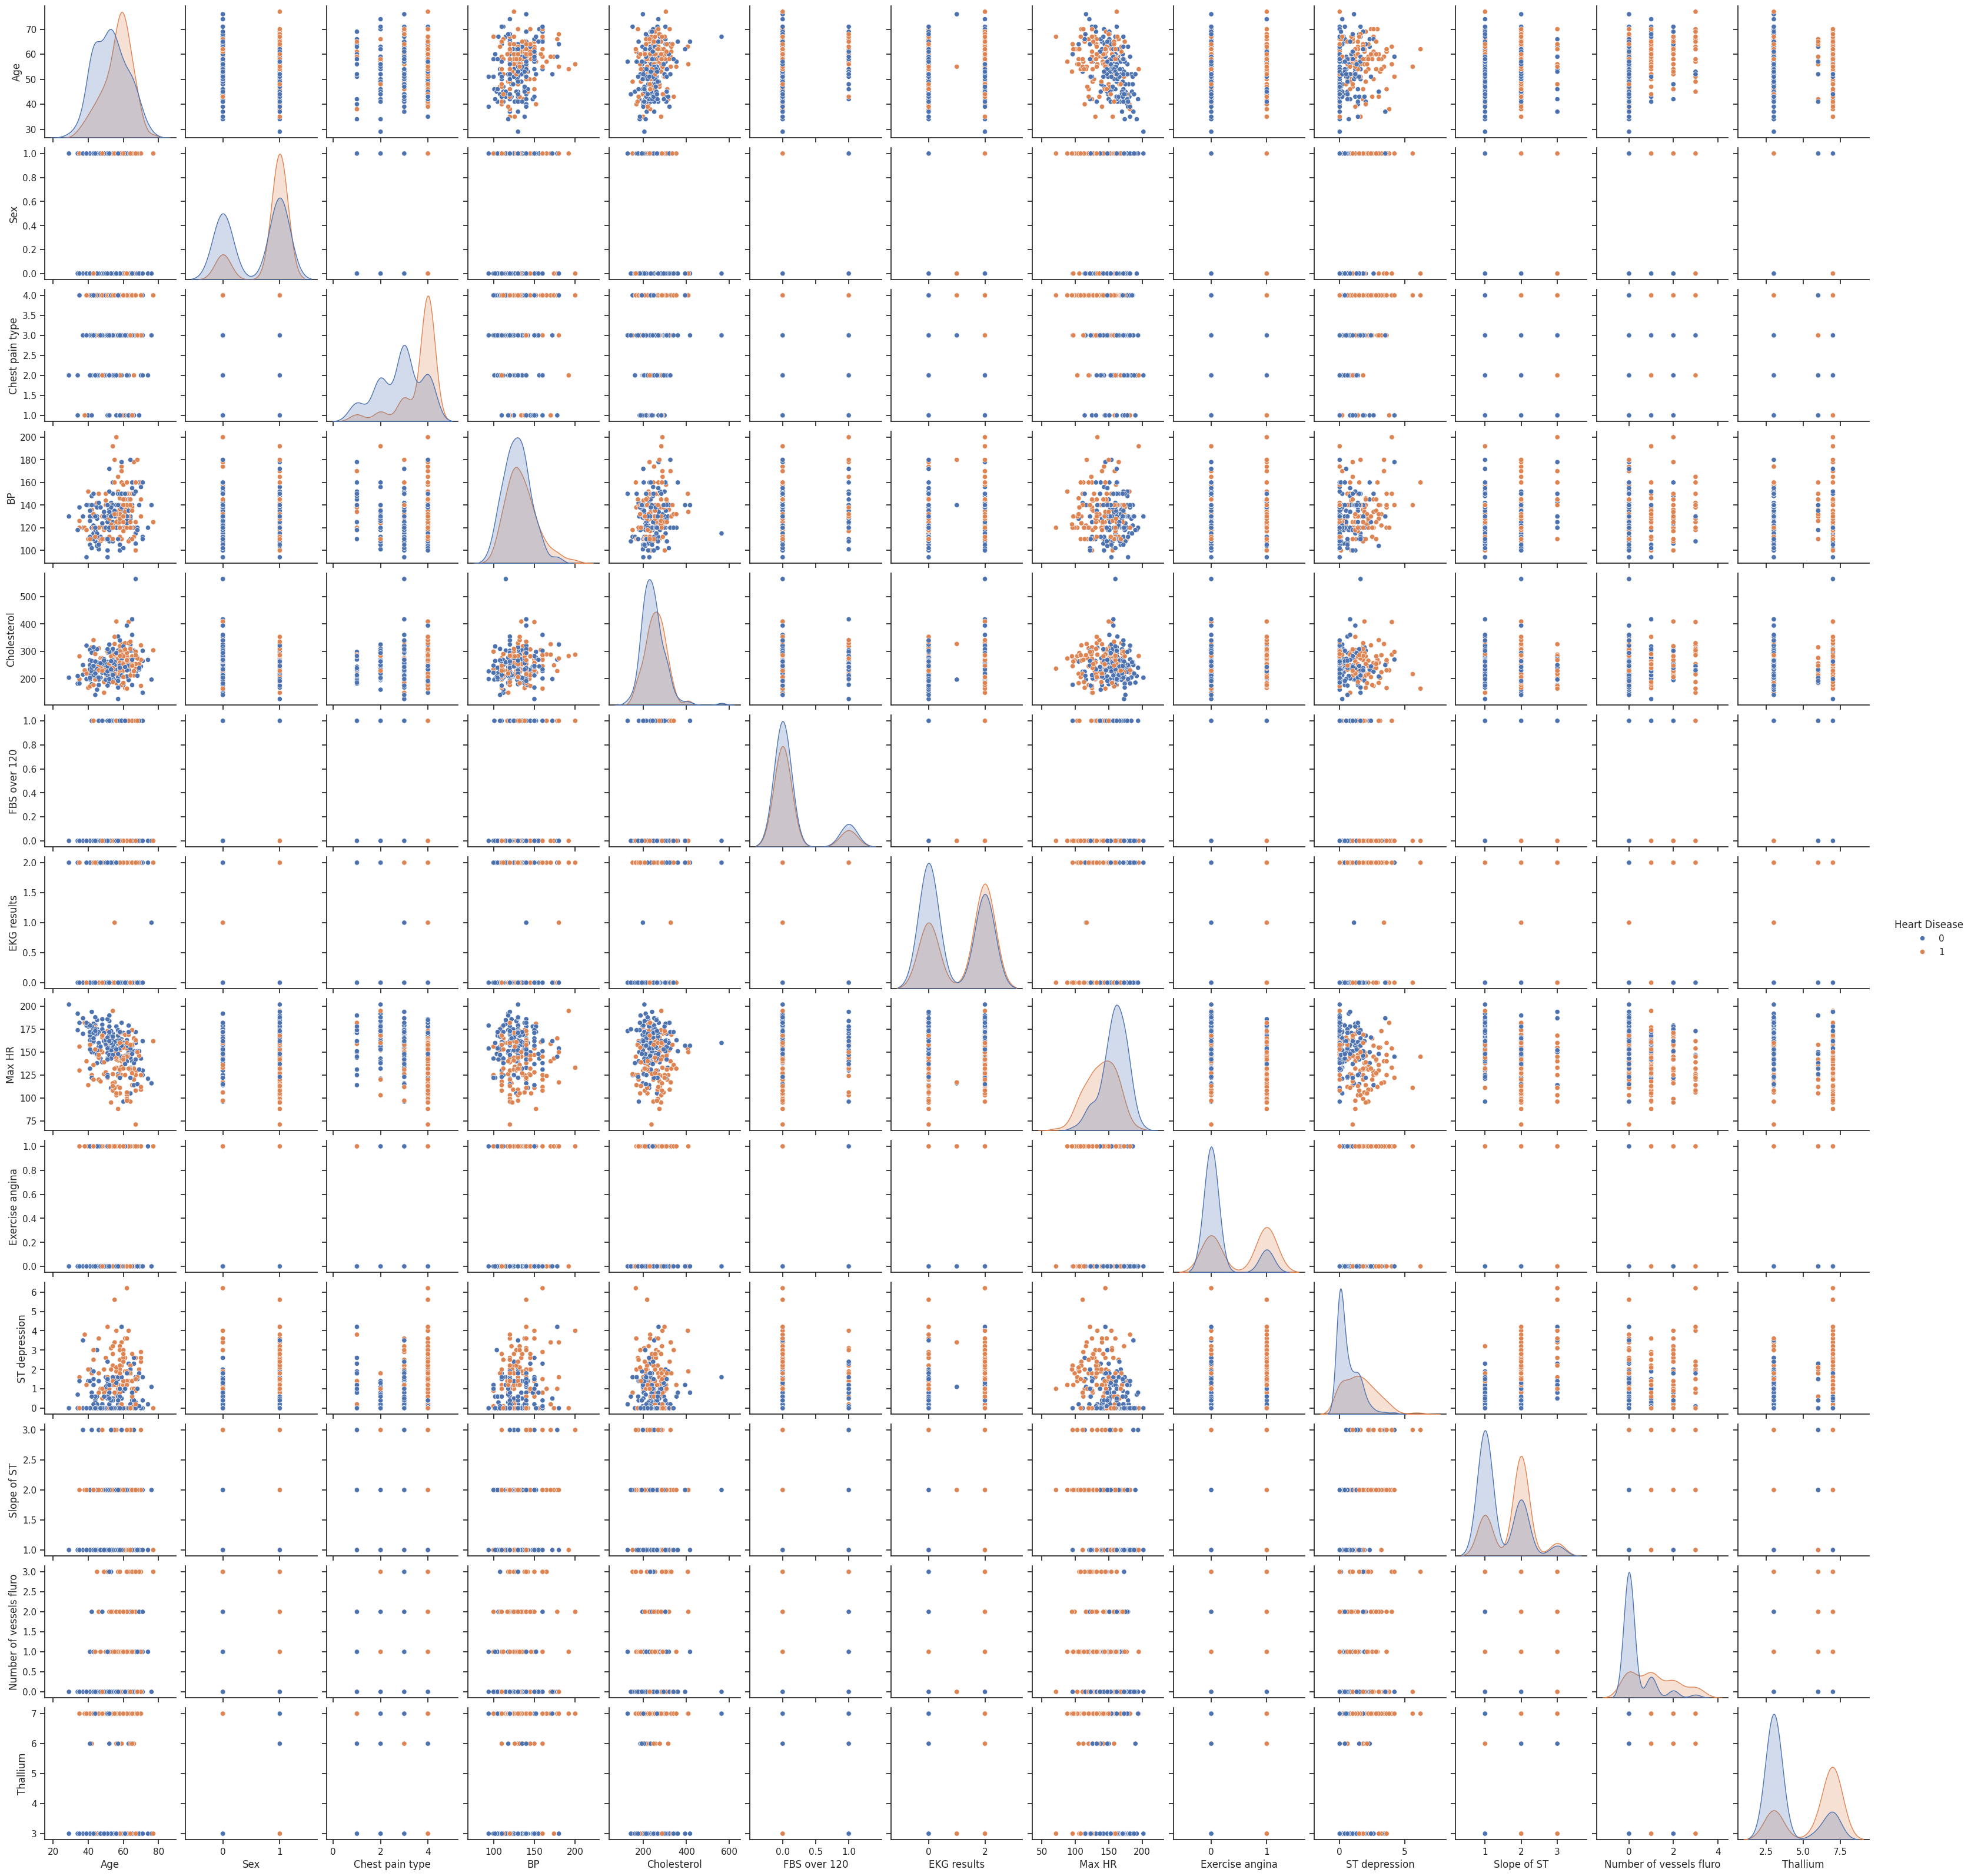

In [56]:
sns.set_theme(style="ticks") # Se estable el estilo del gráfico de pares.
sns.pairplot(df, hue="Heart Disease"); # Se crea un gráfico de pares para visualizar la relación entre todas las variables del dataframe.

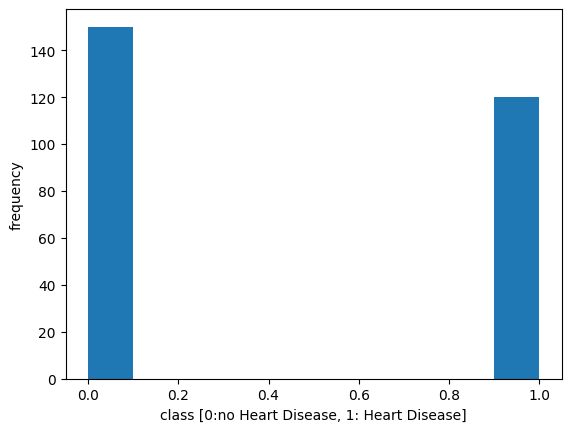

In [45]:
plt.hist(df['Heart Disease']); # Se crea un histograma de la columna occupancy del dataframe.
plt.xlabel('class [0:no Heart Disease, 1: Heart Disease]') # Se etiqueta el eje x para indicar lo que representa: 0 para no ocupado y 1 para ocupado.
plt.ylabel('frequency'); # Se etiqueta el eje Y para mostrar que representa la frecuencia de las clases.

In [46]:
# Set a global seed for reproducibility
tf.random.set_seed(4500) # Se fija una semilla para obtener respuestas similares al trabajar con números aleatorios.

In [47]:
X = df.drop(["Heart Disease"], axis=1) # Se elimina la columna occupancy para las entradas (X).
y = df['Heart Disease']  # El occupancy se convierte en la salida o Y, para predecir si esta ocupada o no la habitación.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) # Se separan los datos de entrenamiento y prueba, corresponiendo el 80% de los datos a el entrenamiento y el resto para prueba, con un random state de 42, para obtener respuestas similares al trabajar con aleatoriedad, además de la inclusión de la función shuffle, ayuda a que exista más esparcimiento entre los datos.

In [49]:
# Standardise features
scaler = StandardScaler() # Herramienta para estandarizar datos y evitar sesgos.
X_train = scaler.fit_transform(X_train) # Estandariza los datos de x train.
X_test = scaler.transform(X_test) # # Estandariza los datos de x test.

In [50]:
# Define the model

def get_model():
    model = tf.keras.Sequential([  # Se crea un modelo secuencial de Keras.
        tf.keras.layers.InputLayer(shape=(len(X.columns),)), # Se establecen 5 entradas para: temperatura, humedad, luz, co2 y relación de humedad.
        tf.keras.layers.Dense(1, activation='sigmoid' ) # Capa con solamente una neurona, y con la función de activación sigmoidal.
    ])
    return model

model = get_model() # Se obtiene el modelo.

In [51]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
from keras.callbacks import EarlyStopping

# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Entrenar el modelo con Early Stopping
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])  # Agregar el callback de Early Stopping


Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5408 - loss: 0.7470 - val_accuracy: 0.5682 - val_loss: 0.8031
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5355 - loss: 0.7321 - val_accuracy: 0.5909 - val_loss: 0.7855
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5422 - loss: 0.7184 - val_accuracy: 0.5909 - val_loss: 0.7686
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5532 - loss: 0.7052 - val_accuracy: 0.5909 - val_loss: 0.7522
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5641 - loss: 0.6926 - val_accuracy: 0.5909 - val_loss: 0.7365
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5751 - loss: 0.6805 - val_accuracy: 0.5909 - val_loss: 0.7213
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6042 - loss: 0.6689 - val_accuracy: 0.5909 - val_loss: 0.7067
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6057 - loss: 0.6578 - val_accuracy: 0.5909

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


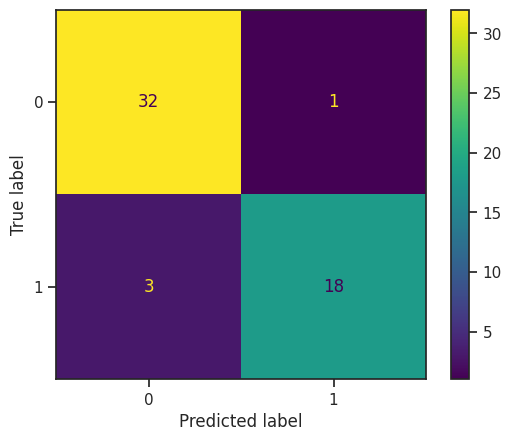

In [61]:
# Predecir valores binarios (0 o 1) con un umbral de 0.5
y_predictions = (model.predict(X_test) > 0.5).astype(int)  # Conviertes las probabilidades en valores binarios

# Calcular la matriz de confusión
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

# Mostrar la matriz de confusión
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
display_matrix.plot()  # Puedes usar diferentes mapas de color como 'Blues' para mayor visibilidad

In [62]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) # Se evalua el modelo con los datos de prueba.
print(f"Test Accuracy: {accuracy:.4f}") # Se muestra la precisión y la pérdida.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9298 - loss: 0.3006 
Test Accuracy: 0.9259


In [63]:
def get_performance_metrics(c_matrix):
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1] # Se obtienen los datos de la matriz de confusión, (verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos).

    accuracy = (tp + tn) / (tp + tn + fp + fn) # Exactitud.
    precision = tp / (tp + fp) # Precisión.
    recall = tp / (tp + fn) # Sensibilidad o Recall.
    specificity = tn / (tn + fp) # Especificidad.
    f1_score = 2 * (precision * recall)/(precision + recall) # F1-score.
    return accuracy, precision, recall, specificity, f1_score # Se devuelven los valores de las métricas de rendimiento.

accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix) # Se obtienen las métricas de desempeño usando la matriz de confusión.

# Se imprimen los resultados con 6 decimales
print(f"Accuracy: {accuracy:0.6f}")
print(f"Precision: {precision:0.6f}")
print(f"Recall: {recall:0.6f}")
print(f"Specificity: {specificity:0.6f}")
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.925926
Precision: 0.947368
Recall: 0.857143
Specificity: 0.969697
F1-score: 0.900000
